# Bankruptcy Prevention

## Business Objective:

This is a classification project, since the variable to predict is binary (bankruptcy or non-bankruptcy). The goal here is to model the probability that a business goes bankrupt from different features.
The data file contains 7 features about 250 companies
The data set includes the following variables:
1.  	industrial_risk:           0=low risk, 0.5=medium risk, 1=high risk.
2.	    management_risk:           0=low risk, 0.5=medium risk, 1=high risk.
3.	    financial flexibility:     0=low flexibility, 0.5=medium flexibility, 1=high flexibility.
4.	    credibility:               0=low credibility, 0.5=medium credibility, 1=high credibility.
5.	    competitiveness:           0=low competitiveness, 0.5=medium competitiveness, 1=high competitiveness.
6.	    operating_risk:            0=low risk, 0.5=medium risk, 1=high risk.
7.	    class:                     bankruptcy, non-bankruptcy (target variable).

## Exploratory Data Analysis - EDA

In [44]:
import pandas as pd 
df = pd.read_excel("bankruptcy-prevention.xlsx")
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [45]:
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [46]:
df.tail()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy
249,1.0,0.0,0.5,0.5,1.0,1.0,non-bankruptcy


In [47]:
df.sample(10)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
32,1.0,0.5,0.0,0.0,0.0,1.0,bankruptcy
43,1.0,1.0,0.0,0.5,0.0,1.0,bankruptcy
7,1.0,1.0,0.0,0.0,0.0,0.5,bankruptcy
221,0.0,0.0,0.5,1.0,1.0,0.0,non-bankruptcy
65,0.5,0.5,0.0,0.0,0.0,1.0,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
103,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
202,0.0,0.0,1.0,0.5,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
157,0.0,0.5,1.0,0.5,1.0,1.0,non-bankruptcy


In [48]:
df.shape

(250, 7)

In [49]:
df.columns

Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk', ' class'],
      dtype='object')

In [50]:
df.dtypes

industrial_risk           float64
 management_risk          float64
 financial_flexibility    float64
 credibility              float64
 competitiveness          float64
 operating_risk           float64
 class                     object
dtype: object

In [51]:
df.isnull().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

In [52]:
df.isnull().any()

industrial_risk           False
 management_risk          False
 financial_flexibility    False
 credibility              False
 competitiveness          False
 operating_risk           False
 class                    False
dtype: bool

In [53]:
df.count()

industrial_risk           250
 management_risk          250
 financial_flexibility    250
 credibility              250
 competitiveness          250
 operating_risk           250
 class                    250
dtype: int64

In [54]:
df.skew()

industrial_risk          -0.067011
 management_risk         -0.444701
 financial_flexibility    0.479134
 credibility              0.112955
 competitiveness          0.093906
 operating_risk          -0.275547
dtype: float64

In [55]:
df.rename(columns={' management_risk': 'management_risk',
                   ' financial_flexibility': 'financial_flexibility' ,
                   ' credibility' : 'credibility' , ' competitiveness' :'competitiveness' ,
                   ' operating_risk' : 'operating_risk' , ' class' : 'class'}, inplace=True)

In [56]:
# replace "bankruptcy" with 1 and "non-bankruptcy" with 0
df['class'] = df['class'].replace({'bankruptcy': 1, 'non-bankruptcy': 0})

## Univariate analysis

In [57]:
df.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000,0.428000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575,0.495781
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
print(df["industrial_risk"].value_counts())
print(df["management_risk"].value_counts())
print(df["financial_flexibility"].value_counts())
print(df["credibility"].value_counts())
print(df["competitiveness"].value_counts())
print(df["operating_risk"].value_counts())
print(df["class"].value_counts())

1.0    89
0.5    81
0.0    80
Name: industrial_risk, dtype: int64
1.0    119
0.5     69
0.0     62
Name: management_risk, dtype: int64
0.0    119
0.5     74
1.0     57
Name: financial_flexibility, dtype: int64
0.0    94
1.0    79
0.5    77
Name: credibility, dtype: int64
0.0    103
1.0     91
0.5     56
Name: competitiveness, dtype: int64
1.0    114
0.0     79
0.5     57
Name: operating_risk, dtype: int64
0    143
1    107
Name: class, dtype: int64


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 13.8 KB


In [60]:
import plotly.express as px

fig = px.histogram(df, x='industrial_risk', color='class', barmode='stack')
fig.show()

fig = px.histogram(df, x='management_risk', color='class', barmode='stack')
fig.show()

fig = px.histogram(df, x='financial_flexibility', color='class', barmode='stack')
fig.show()

fig = px.histogram(df, x='credibility', color='class', barmode='stack')
fig.show()

fig = px.histogram(df, x='competitiveness', color='class', barmode='stack')
fig.show()

fig = px.histogram(df, x='operating_risk', color='class', barmode='stack')
fig.show()

<AxesSubplot:ylabel='class'>

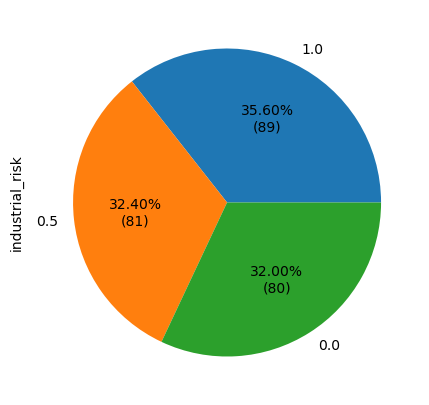

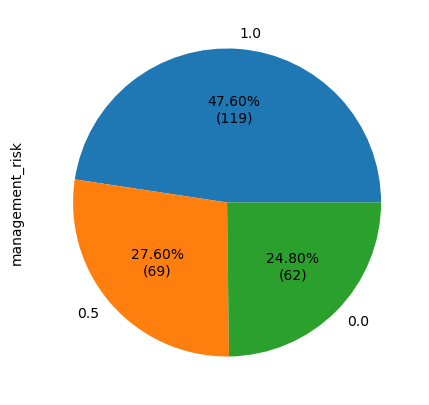

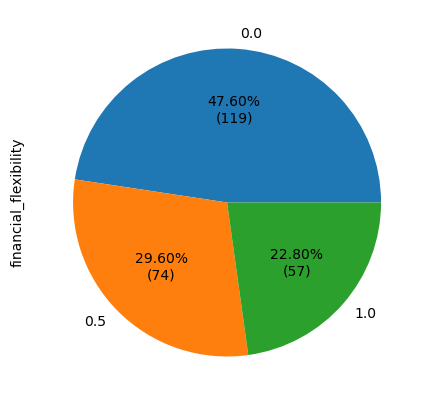

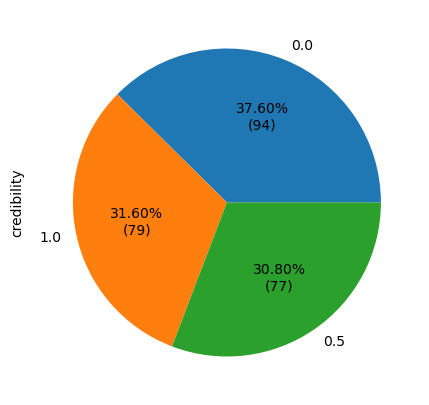

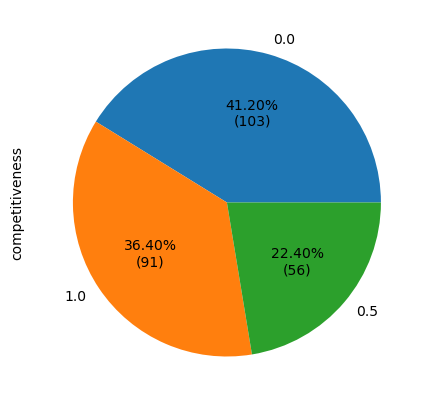

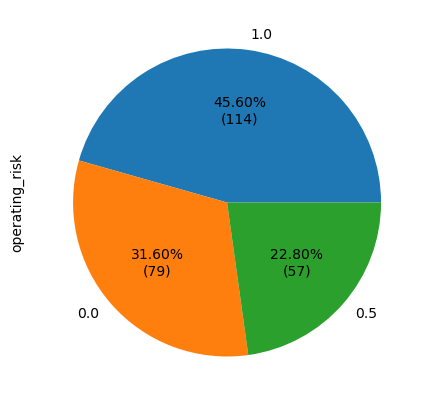

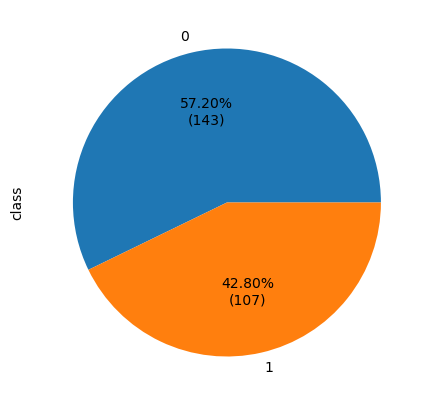

In [61]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(5,5))
df['industrial_risk'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(df['industrial_risk'].value_counts().sum())))

plt.figure(figsize=(5,5))
df['management_risk'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(df['management_risk'].value_counts().sum())))

plt.figure(figsize=(5,5))
df['financial_flexibility'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(df['financial_flexibility'].value_counts().sum())))

plt.figure(figsize=(5,5))
df['credibility'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(df['credibility'].value_counts().sum())))

plt.figure(figsize=(5,5))
df['competitiveness'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(df['competitiveness'].value_counts().sum())))

plt.figure(figsize=(5,5))
df['operating_risk'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(df['operating_risk'].value_counts().sum())))

plt.figure(figsize=(5,5))
df['class'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(df['class'].value_counts().sum())))

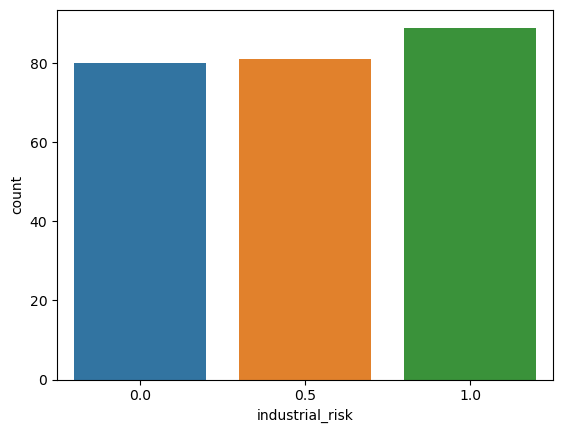

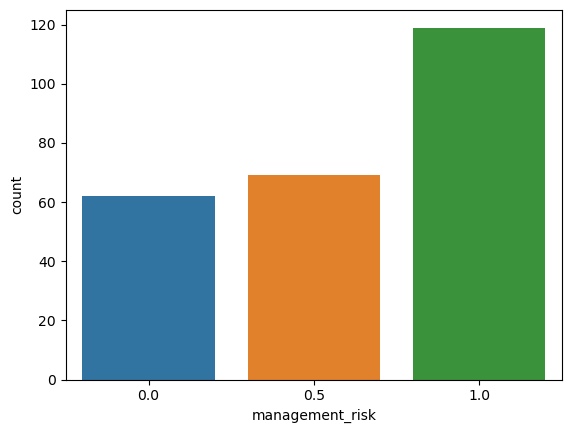

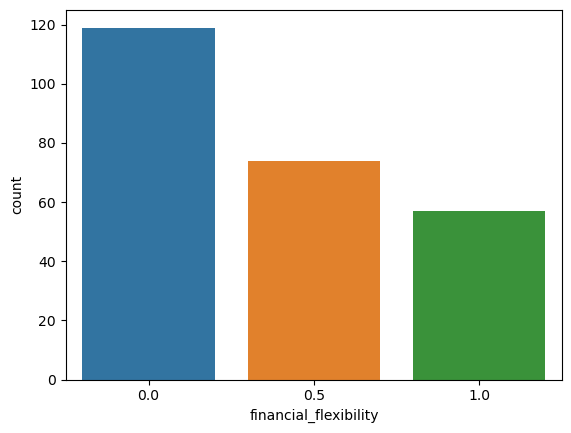

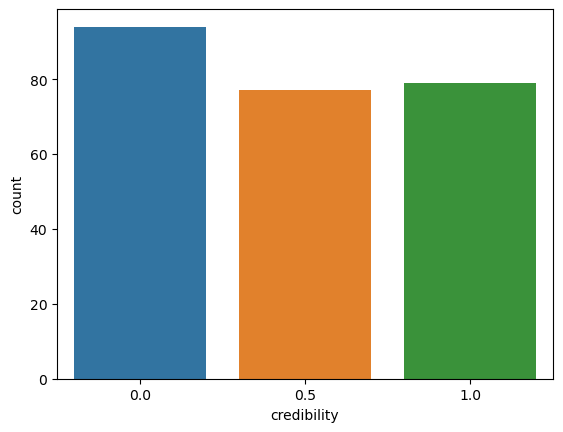

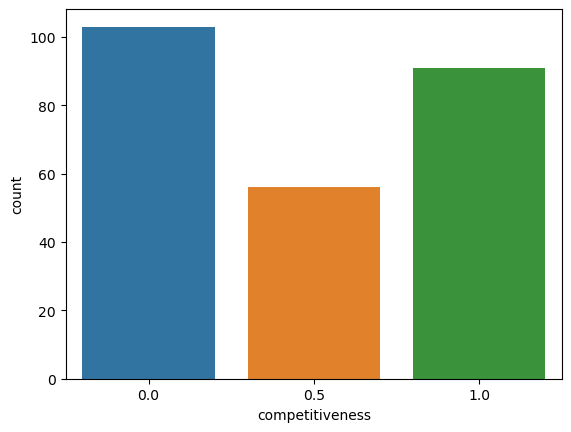

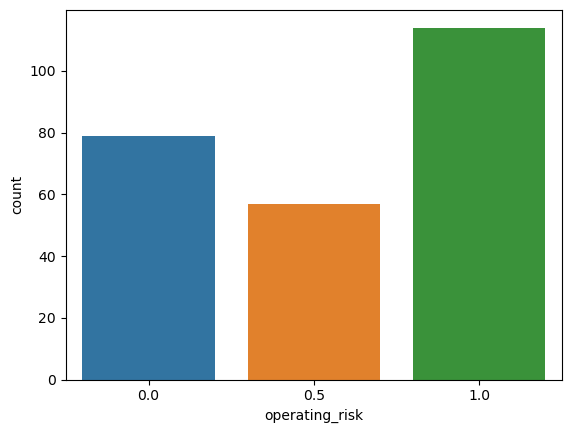

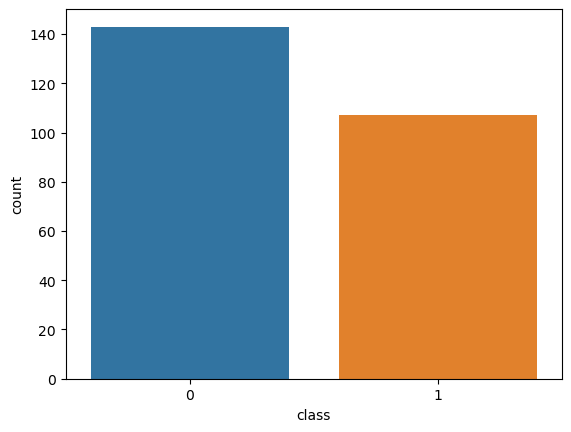

In [62]:
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns

sns.countplot(df["industrial_risk"])
plt.show()
sns.countplot(df["management_risk"])
plt.show()
sns.countplot(df["financial_flexibility"])
plt.show()
sns.countplot(df["credibility"])
plt.show()
sns.countplot(df["competitiveness"])
plt.show()
sns.countplot(df["operating_risk"])
plt.show()
sns.countplot(df["class"])
plt.show()

## Multivariate analysis

In [63]:
df.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,0.227823
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,0.370838
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,-0.751020
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,-0.755909
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,-0.899452
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,0.279786
class,0.227823,0.370838,-0.751020,-0.755909,-0.899452,0.279786,1.000000


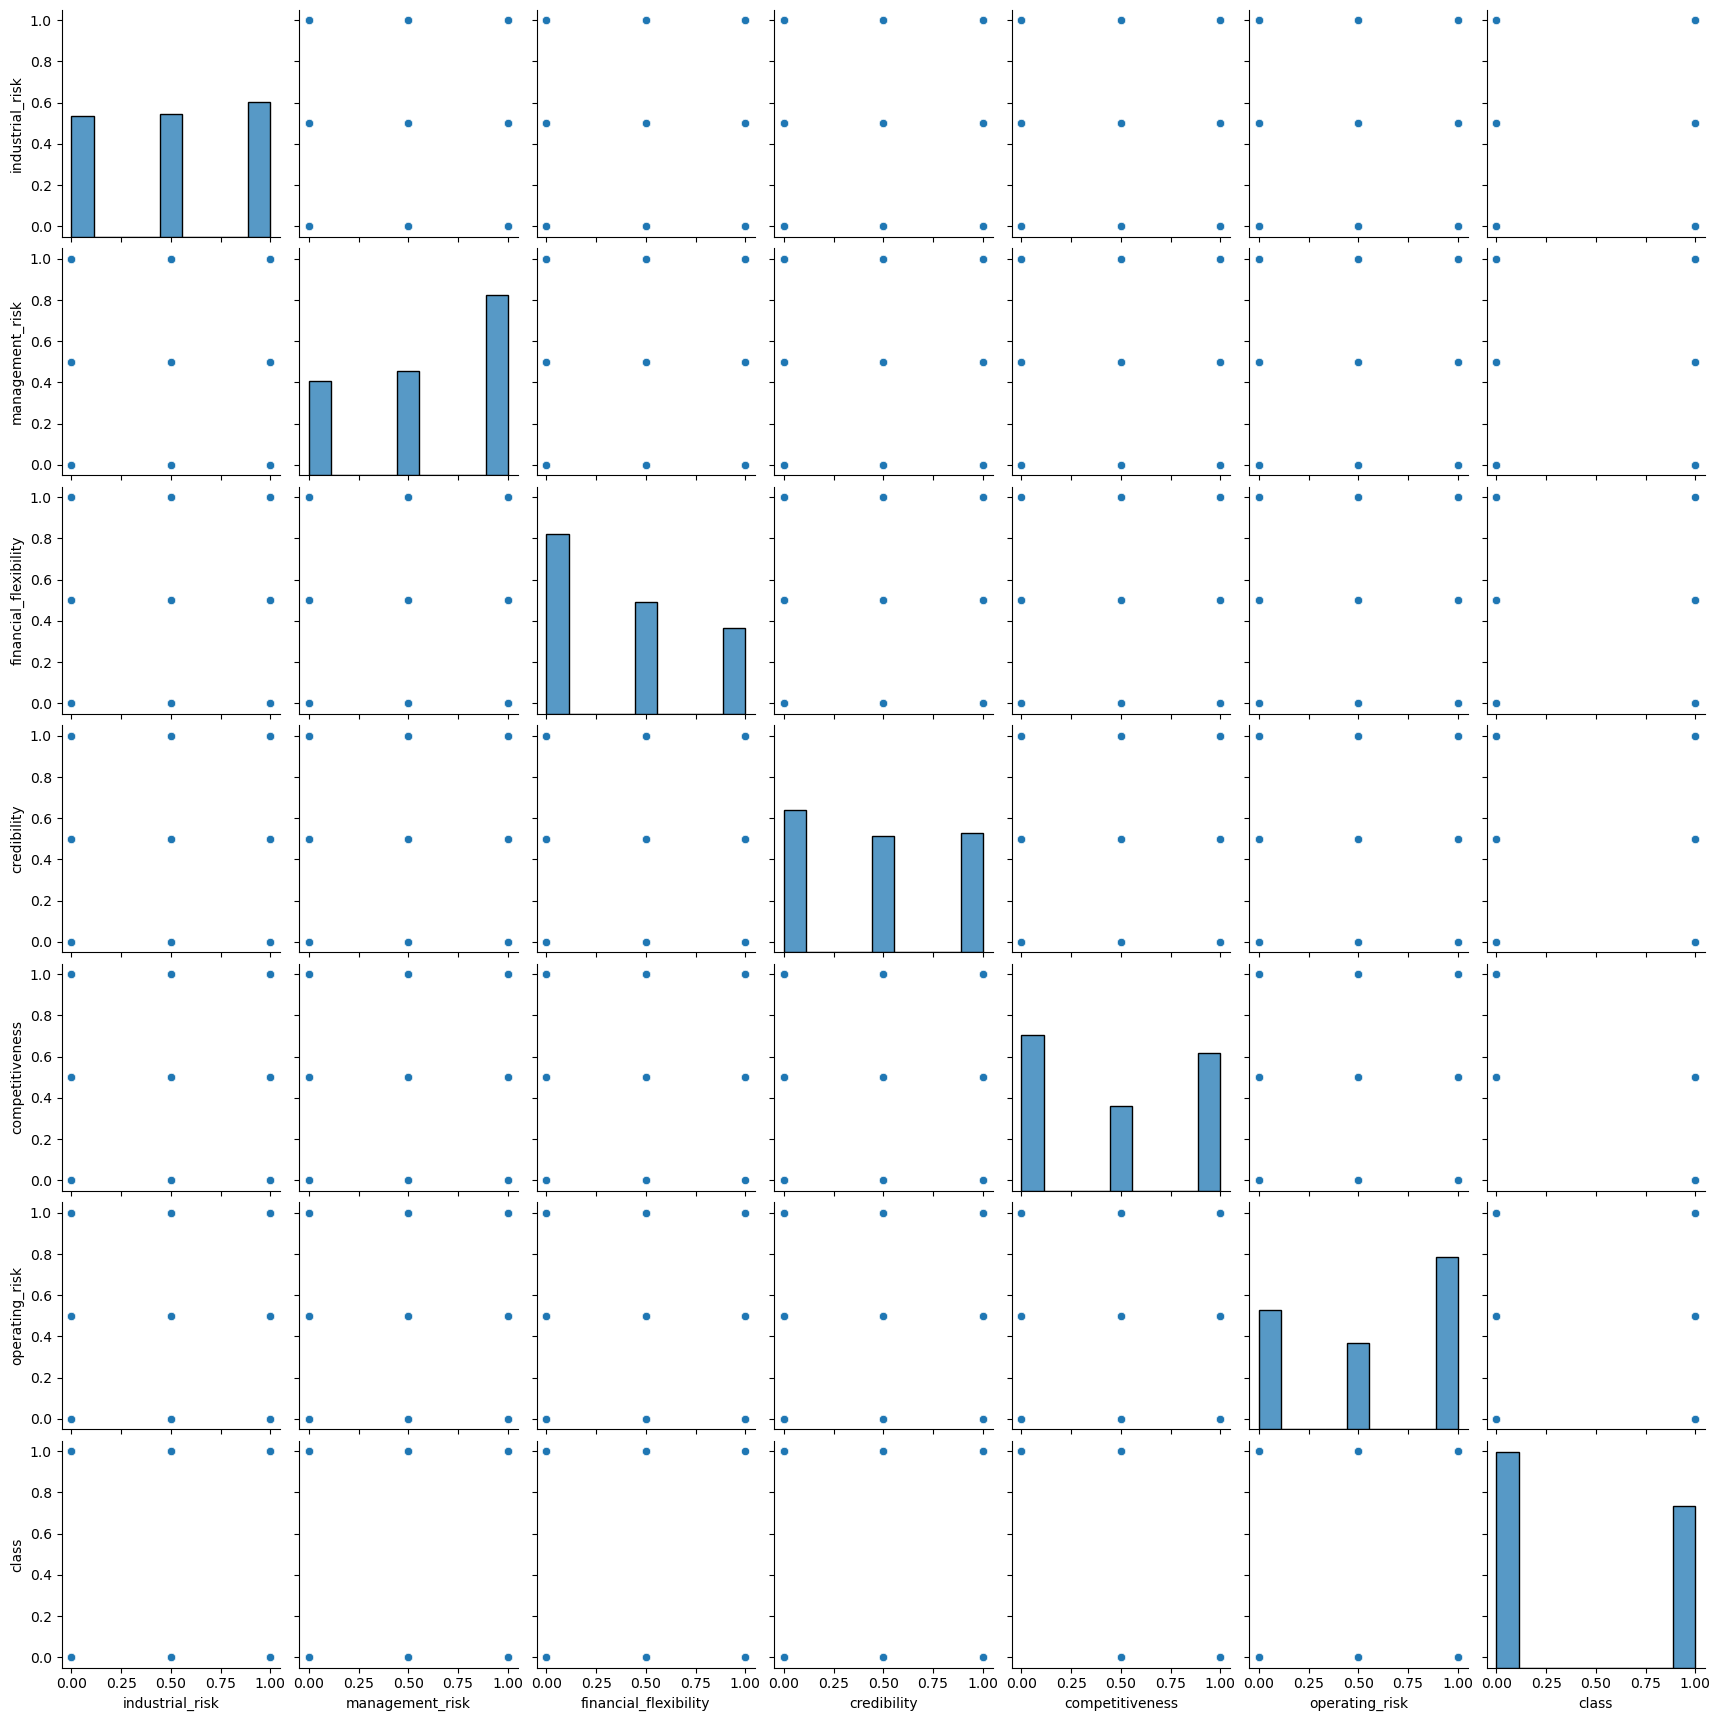

In [64]:
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.pairplot(data=df)
plt.show()

<AxesSubplot:>

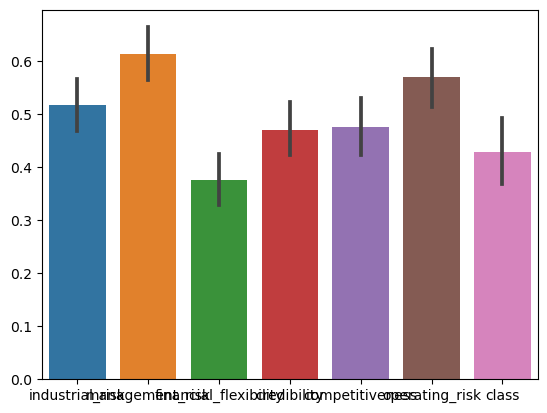

In [65]:
sns.barplot(data = df)

<AxesSubplot:>

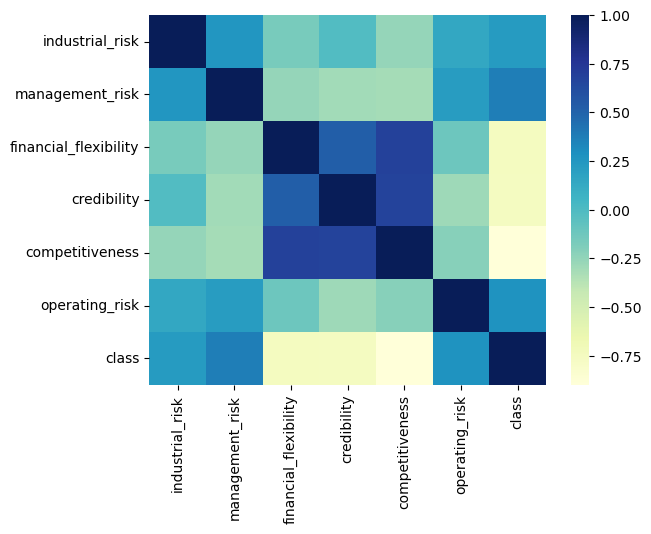

In [66]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap="YlGnBu")

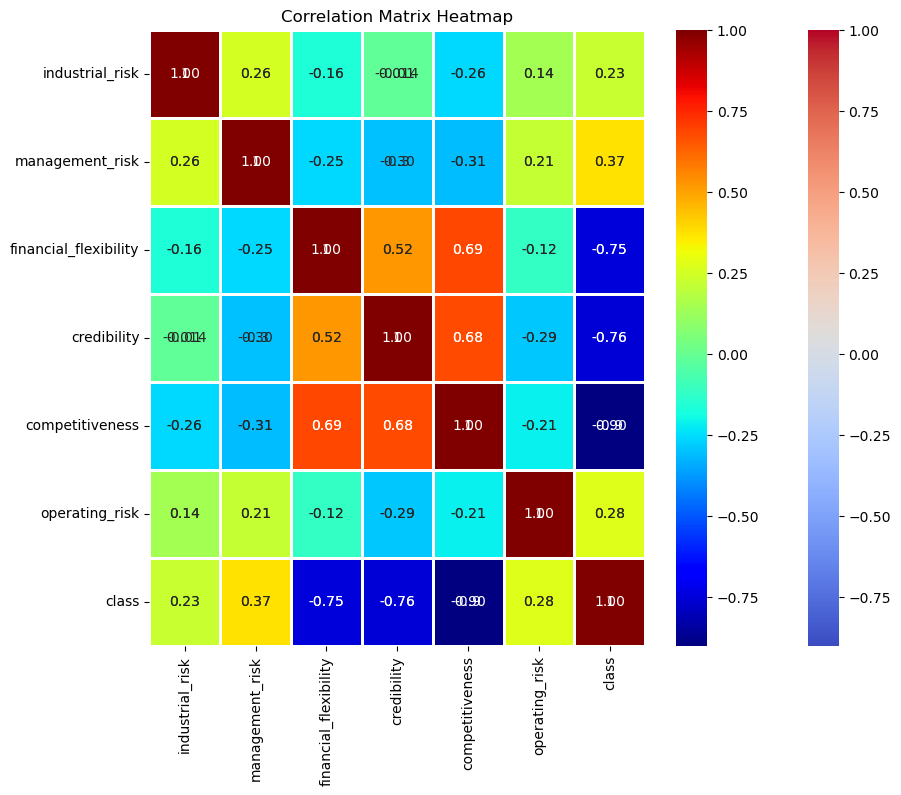

In [67]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f")
sns.heatmap(data=df.corr(), cmap="jet", annot=True,linewidths=1, linecolor='white')
ax.set_title("Correlation Matrix Heatmap")
# Show the plot
plt.show()

## Feature Importance

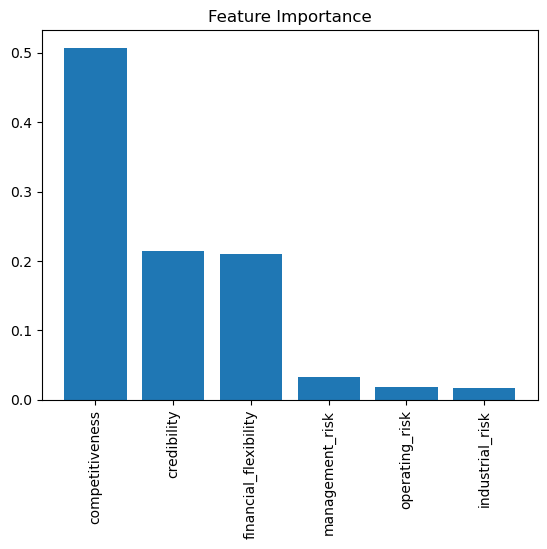

In [68]:
# Split the dataset into features (X) and target variable (y)
X = df.drop("class", axis=1)
y = df["class"]

# Create a Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the data
rfc.fit(X, y)

# Get feature importances
importances = rfc.feature_importances_

# Sort feature importances in descending order
import numpy as np
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

The feature competitiveness has the highest importance among all the features, it indicates that this feature has the most predictive power in determining whether a company is at risk of bankruptcy or not. This means that companies with high competitiveness are less likely to face the risk of bankruptcy, while companies with low competitiveness are more likely to face the risk of bankruptcy.

In [69]:
X = df.iloc[:,0:6]
y = df.iloc[:,-1]

# Train Test Split

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state = 42)

In [71]:
X_train

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
132,0.0,1.0,0.5,0.5,0.5,0.0
225,0.0,0.0,1.0,1.0,0.5,0.0
238,0.5,0.5,1.0,1.0,0.5,0.5
119,1.0,1.0,0.5,1.0,1.0,1.0
136,1.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...
106,0.0,1.0,0.0,0.0,0.5,0.5
14,0.0,1.0,0.0,0.0,0.5,0.5
92,0.5,1.0,0.0,0.0,0.0,0.5
179,0.0,0.5,1.0,0.5,1.0,0.0


In [72]:
X_test

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
142,0.0,1.0,1.0,1.0,0.5,1.0
6,1.0,1.0,0.0,0.0,0.0,0.0
97,1.0,1.0,0.0,0.5,0.0,0.5
60,0.0,1.0,0.0,0.0,0.0,0.0
112,0.5,0.5,1.0,1.0,1.0,0.5
181,0.5,0.5,0.5,0.5,0.5,0.0
197,0.5,0.5,0.5,1.0,1.0,0.0
184,0.5,0.0,0.5,1.0,0.5,0.0
9,1.0,1.0,0.0,0.5,0.0,1.0
104,0.5,1.0,0.0,0.0,0.0,1.0


In [73]:
y_train

132    0
225    0
238    0
119    0
136    0
      ..
106    1
14     1
92     1
179    0
102    1
Name: class, Length: 200, dtype: int64

In [74]:
y_test

142    0
6      1
97     1
60     1
112    0
181    0
197    0
184    0
9      1
104    1
200    0
216    0
236    0
240    0
67     1
224    0
194    0
15     1
177    0
24     1
247    0
19     1
114    0
68     1
176    0
45     1
55     1
10     1
30     1
120    0
201    0
33     1
141    0
219    0
25     1
111    0
18     1
196    0
180    0
159    0
118    0
96     1
108    0
185    0
222    0
16     1
146    0
69     1
173    0
38     1
Name: class, dtype: int64

In [75]:
X_train.shape

(200, 6)

In [76]:
y_train.shape

(200,)

In [77]:
X_test.shape

(50, 6)

In [78]:
y_test.shape

(50,)

# Model Buliding

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score , classification_report , accuracy_score , precision_score , recall_score

## LogisticRegression

In [80]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [81]:
lr_pred_train = lr.predict(X_train)
lr_pred_train

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1], dtype=int64)

In [82]:
lr_pred_test = lr.predict(X_test)
lr_pred_test

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1], dtype=int64)

In [83]:
score = lr.score(X_train, y_train)
print(" LogisticRegression Train Accuracy: {:.2f}%".format(score*100))

 LogisticRegression Train Accuracy: 99.50%


In [84]:
score = lr.score(X_test, y_test)
print(" LogisticRegression Test Accuracy: {:.2f}%".format(score*100))

 LogisticRegression Test Accuracy: 100.00%


In [85]:
# Print the classification report
print(classification_report(y_test, lr_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        21

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



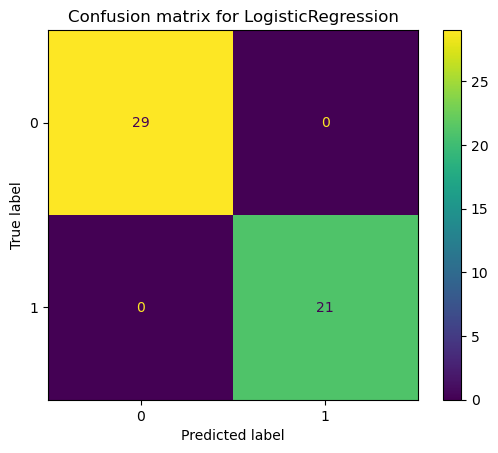

In [87]:
from sklearn.metrics import plot_confusion_matrix
cf_lr = plot_confusion_matrix(lr, X_test, y_test)
cf_lr.ax_.set_title('Confusion matrix for LogisticRegression')
plt.show()

# SVM

In [88]:
from sklearn.svm import SVC
#Linear_Function
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [89]:
svm_pred_train = svm.predict(X_train)
svm_pred_train

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1], dtype=int64)

In [90]:
svm_pred_test = svm.predict(X_test)
svm_pred_test

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1], dtype=int64)

In [91]:
score = svm.score(X_train, y_train)
print(" SVM Train Accuracy: {:.2f}%".format(score*100))

 SVM Train Accuracy: 99.50%


In [92]:
score = svm.score(X_train, y_train)
print(" SVM Train Accuracy: {:.2f}%".format(score*100))

 SVM Train Accuracy: 99.50%


In [93]:
print(classification_report(y_test, svm_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        21

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



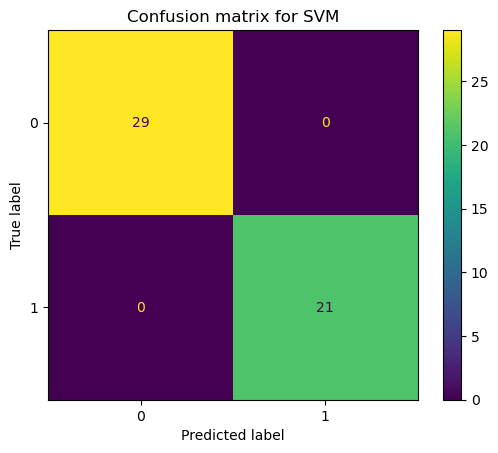

In [94]:
cf_svm = plot_confusion_matrix(lr, X_test, y_test)
cf_svm.ax_.set_title('Confusion matrix for SVM')
plt.show()

# ANN

In [95]:
from keras.models import Sequential
from keras.layers import Dense
ann = Sequential()
ann.add(Dense(units=16, activation='relu', input_dim=6))
ann.add(Dense(units=8, activation='relu'))
ann.add(Dense(units=1, activation='sigmoid'))

In [96]:
ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [97]:
history = ann.fit(X, y, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
7/7 [==============================] - 3s 53ms/step - loss: 0.6790 - accuracy: 0.5600 - val_loss: 0.7601 - val_accuracy: 0.2400
Epoch 2/30
7/7 [==============================] - 0s 7ms/step - loss: 0.6614 - accuracy: 0.6650 - val_loss: 0.7287 - val_accuracy: 0.4200
Epoch 3/30
7/7 [==============================] - 0s 7ms/step - loss: 0.6402 - accuracy: 0.7400 - val_loss: 0.7068 - val_accuracy: 0.5200
Epoch 4/30
7/7 [==============================] - 0s 7ms/step - loss: 0.6188 - accuracy: 0.7750 - val_loss: 0.6871 - val_accuracy: 0.6000
Epoch 5/30
7/7 [==============================] - 0s 8ms/step - loss: 0.5995 - accuracy: 0.8250 - val_loss: 0.6699 - val_accuracy: 0.6600
Epoch 6/30
7/7 [==============================] - 0s 8ms/step - loss: 0.5795 - accuracy: 0.8400 - val_loss: 0.6507 - val_accuracy: 0.7000
Epoch 7/30
7/7 [==============================] - 0s 7ms/step - loss: 0.5578 - accuracy: 0.8650 - val_loss: 0.6311 - val_accuracy: 0.7600
Epoch 8/30
7/7 [=================

In [98]:
# Evaluate the model on train data
loss, accuracy = ann.evaluate(X_train, y_train)
print('Train accuracy:', accuracy)

7/7 [==============================] - 0s 1ms/step - loss: 0.1242 - accuracy: 0.9900
Train accuracy: 0.9900000095367432


In [99]:
# Evaluate the model on test data
loss, accuracy = ann.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

2/2 [==============================] - 0s 3ms/step - loss: 0.1315 - accuracy: 0.9600
Test accuracy: 0.9599999785423279


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


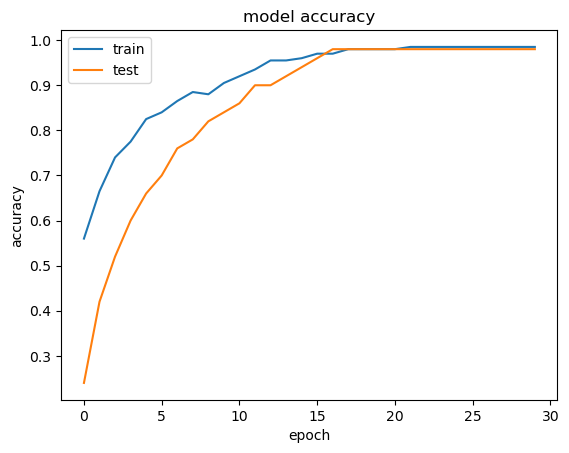

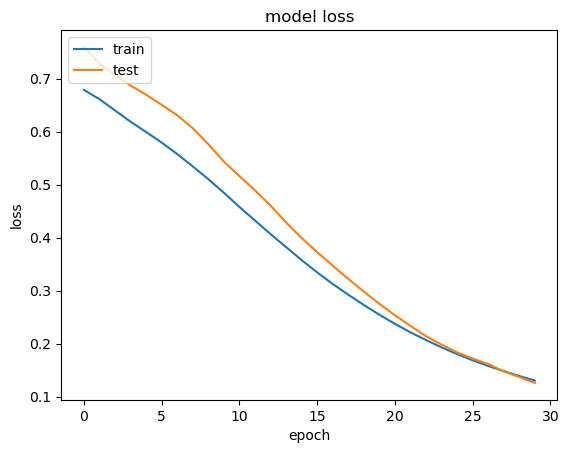

In [100]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [101]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                112       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [102]:
ann_pred_test = ann.predict(X_test)
ann_pred_test

2/2 [==============================] - 0s 2ms/step


array([[0.06707059],
       [0.9052833 ],
       [0.8910345 ],
       [0.74412453],
       [0.03135502],
       [0.11520987],
       [0.05049813],
       [0.06183145],
       [0.9444518 ],
       [0.9499069 ],
       [0.08522948],
       [0.5417908 ],
       [0.0717648 ],
       [0.16099544],
       [0.9444518 ],
       [0.10624213],
       [0.28604573],
       [0.91400003],
       [0.07751402],
       [0.94989765],
       [0.10106976],
       [0.8365297 ],
       [0.08362561],
       [0.9134353 ],
       [0.11400814],
       [0.91674364],
       [0.8910345 ],
       [0.9134353 ],
       [0.9499069 ],
       [0.16901161],
       [0.11400814],
       [0.91674364],
       [0.1575385 ],
       [0.02622526],
       [0.9422017 ],
       [0.02622526],
       [0.9499069 ],
       [0.05079384],
       [0.1147488 ],
       [0.19763537],
       [0.06624319],
       [0.97121286],
       [0.5417908 ],
       [0.23957904],
       [0.08362561],
       [0.91400003],
       [0.06443197],
       [0.916

# Decision Trees

In [103]:
from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import  DecisionTreeClassifier

In [104]:
dt = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

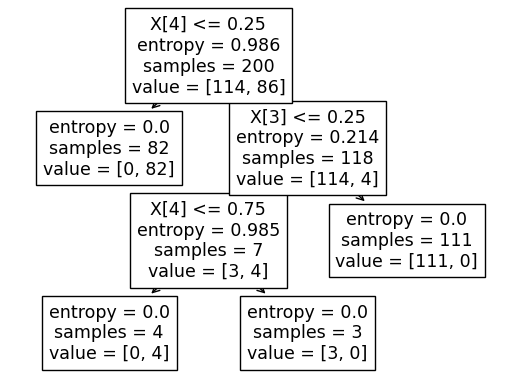

In [105]:
tree.plot_tree(dt);

In [106]:
text = tree.export_text(dt,max_depth=3)  
print(text)

|--- feature_4 <= 0.25
|   |--- class: 1
|--- feature_4 >  0.25
|   |--- feature_3 <= 0.25
|   |   |--- feature_4 <= 0.75
|   |   |   |--- class: 1
|   |   |--- feature_4 >  0.75
|   |   |   |--- class: 0
|   |--- feature_3 >  0.25
|   |   |--- class: 0



In [107]:
dt.feature_importances_ 

array([0.        , 0.        , 0.        , 0.09284613, 0.90715387,
       0.        ])

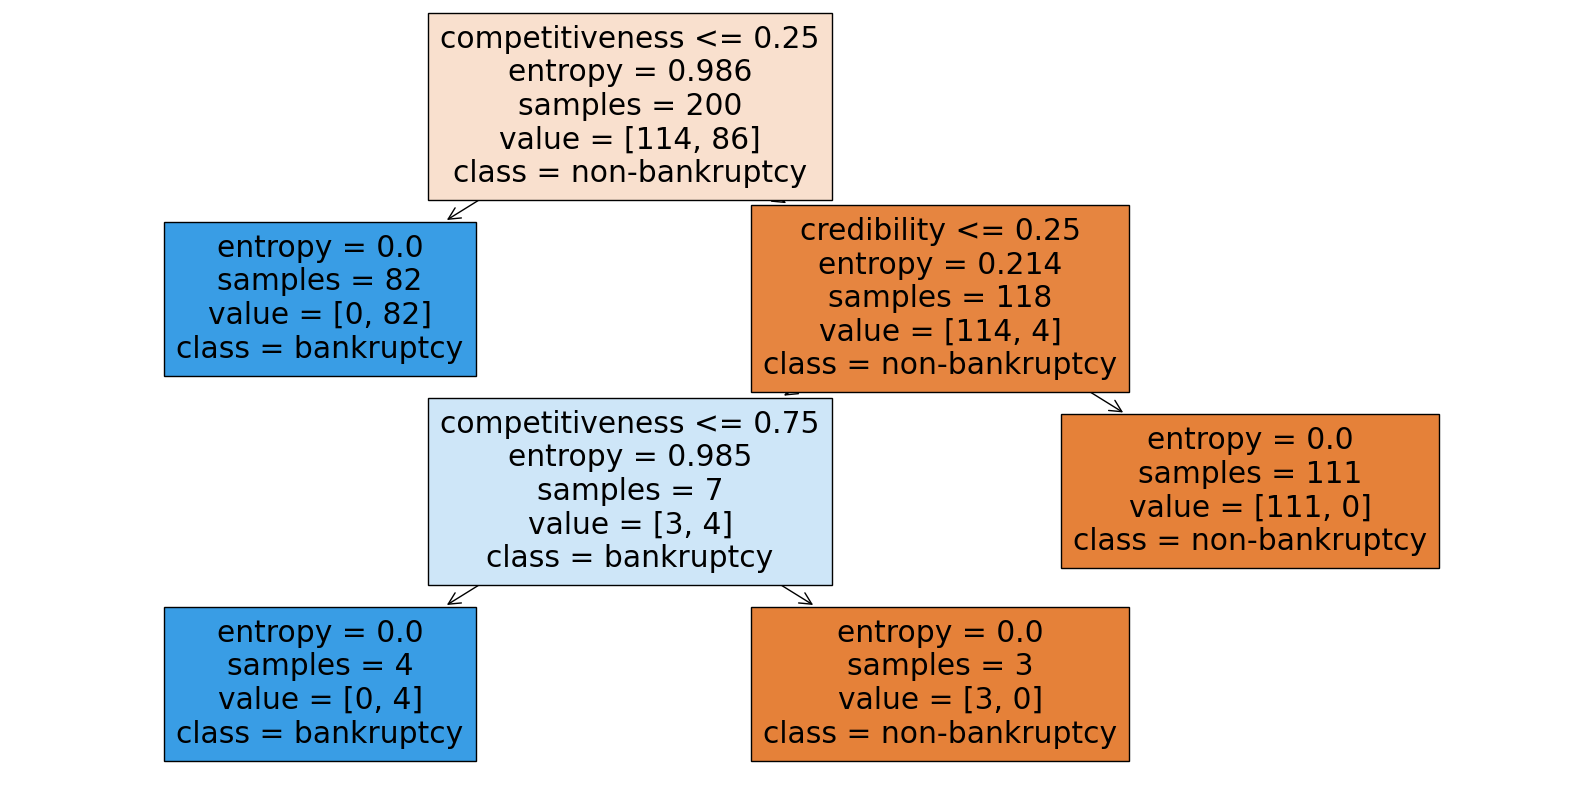

In [108]:
from sklearn.tree import plot_tree
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=['non-bankruptcy', 'bankruptcy'], filled=True)
plt.show()

In [109]:
dt_pred_test = dt.predict(X_test)
dt_pred_test

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1], dtype=int64)

In [110]:
score = dt.score(X_train, y_train)
print(" Train Accuracy: {:.2f}%".format(score*100))

 Train Accuracy: 100.00%


In [111]:
score = dt.score(X_test, y_test)
print(" Test Accuracy: {:.2f}%".format(score*100))

 Test Accuracy: 98.00%


In [112]:
# Print the classification report
print(classification_report(y_test, dt_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.95      1.00      0.98        21

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



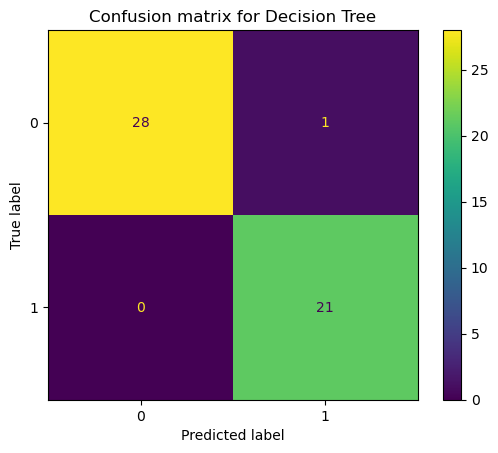

In [113]:
cf_dt = plot_confusion_matrix(dt, X_test, y_test)
cf_dt.ax_.set_title('Confusion matrix for Decision Tree')
plt.show()

# KNN

In [114]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [115]:
knn_pred_train = knn.predict(X_train)
knn_pred_train

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1], dtype=int64)

In [116]:
knn_pred_test = knn.predict(X_test)
knn_pred_test

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1], dtype=int64)

In [117]:
score = knn.score(X_test,y_test)
print("Test Accuracy : {:.2f}".format(score*100))

Test Accuracy : 100.00


In [118]:
score = knn.score(X_train , y_train)
print("Train Accuracy : {:.2f}".format(score*100))

Train Accuracy : 99.50


In [119]:
# Print the classification report
print(classification_report(y_test, knn_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        21

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



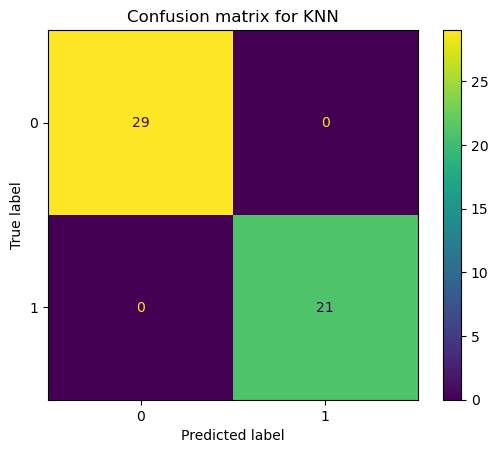

In [120]:
cf_knn = plot_confusion_matrix(knn, X_test, y_test)
cf_knn.ax_.set_title('Confusion matrix for KNN')
plt.show()

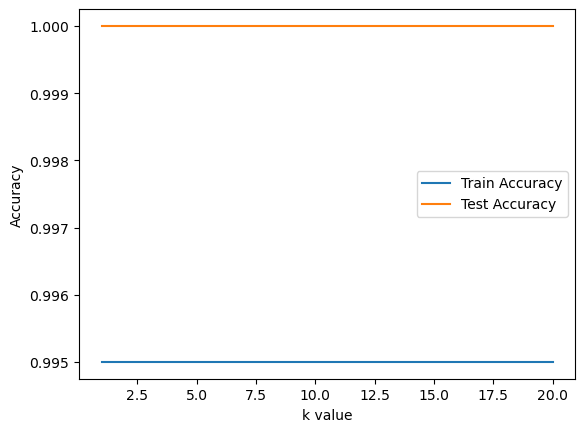

In [121]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

k_values = range(1, 21)
train_scores = []
test_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    train_score = accuracy_score(y_train, knn_pred_train)
    train_scores.append(train_score)
    
    test_pred = knn.predict(X_test)
    test_score = accuracy_score(y_test, knn_pred_test)
    test_scores.append(test_score)

plt.plot(k_values, train_scores, label='Train Accuracy')
plt.plot(k_values, test_scores, label='Test Accuracy')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Naive Bayes Classifier

In [122]:
#MultinomialNB
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB
from sklearn.metrics import plot_confusion_matrix,classification_report

## MultinomialNB Model

In [123]:
nb1 = MB()
nb1.fit(X_train,y_train)

MultinomialNB()

In [124]:
nb1_pred_train = nb1.predict(X_train)
nb1_pred_train

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1], dtype=int64)

In [125]:
nb1_pred_test = nb1.predict(X_test)
nb1_pred_test

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1], dtype=int64)

In [126]:
def report(nb1):
    preds = nb1.predict(X_test)
    print(classification_report(y_test,nb1_pred_test))
    plot_confusion_matrix(nb1,X_test,nb1_pred_test)

MultinomialNB
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        21

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



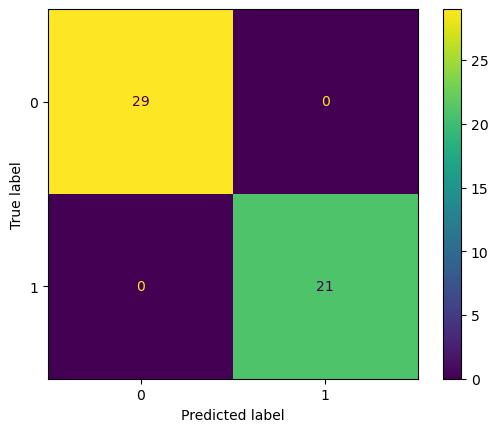

In [127]:
#MultinomialNB Evaluation
print('MultinomialNB')
report(nb1)

In [128]:
score = nb1.score(X_train,y_train)
print("Train Accuracy : {:.2f}".format(score*100))

Train Accuracy : 97.00


In [129]:
score = nb1.score(X_test,y_test)
print("Test Accuracy : {:.2f}".format(score*100))

Test Accuracy : 100.00


## GaussianNB Model

In [130]:
nb2 = GB()
nb2.fit(X,y)

GaussianNB()

In [131]:
nb2_pred_train = nb2.predict(X_train)
nb2_pred_train

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1], dtype=int64)

In [132]:
nb2_pred_test = nb2.predict(X_test)
nb2_pred_test

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1], dtype=int64)

In [133]:
def report(nb2):
    preds = nb2.predict(X_test)
    print(classification_report(y_test,nb2_pred_test))
    plot_confusion_matrix(nb1,X_test,nb2_pred_test)

GaussianNB
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        21

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



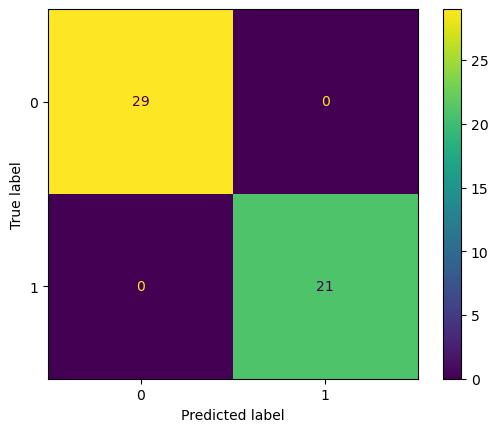

In [134]:
#GaussianNB Evaluation
print('GaussianNB')
report(nb2)

In [135]:
score = nb2.score(X_train,y_train)
print("Train Accuracy : {:.2f}".format(score*100))

Train Accuracy : 97.50


In [136]:
score = nb2.score(X_test,y_test)
print("Test Accuracy : {:.2f}".format(score*100))

Test Accuracy : 100.00


# RandomForest

In [137]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [138]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

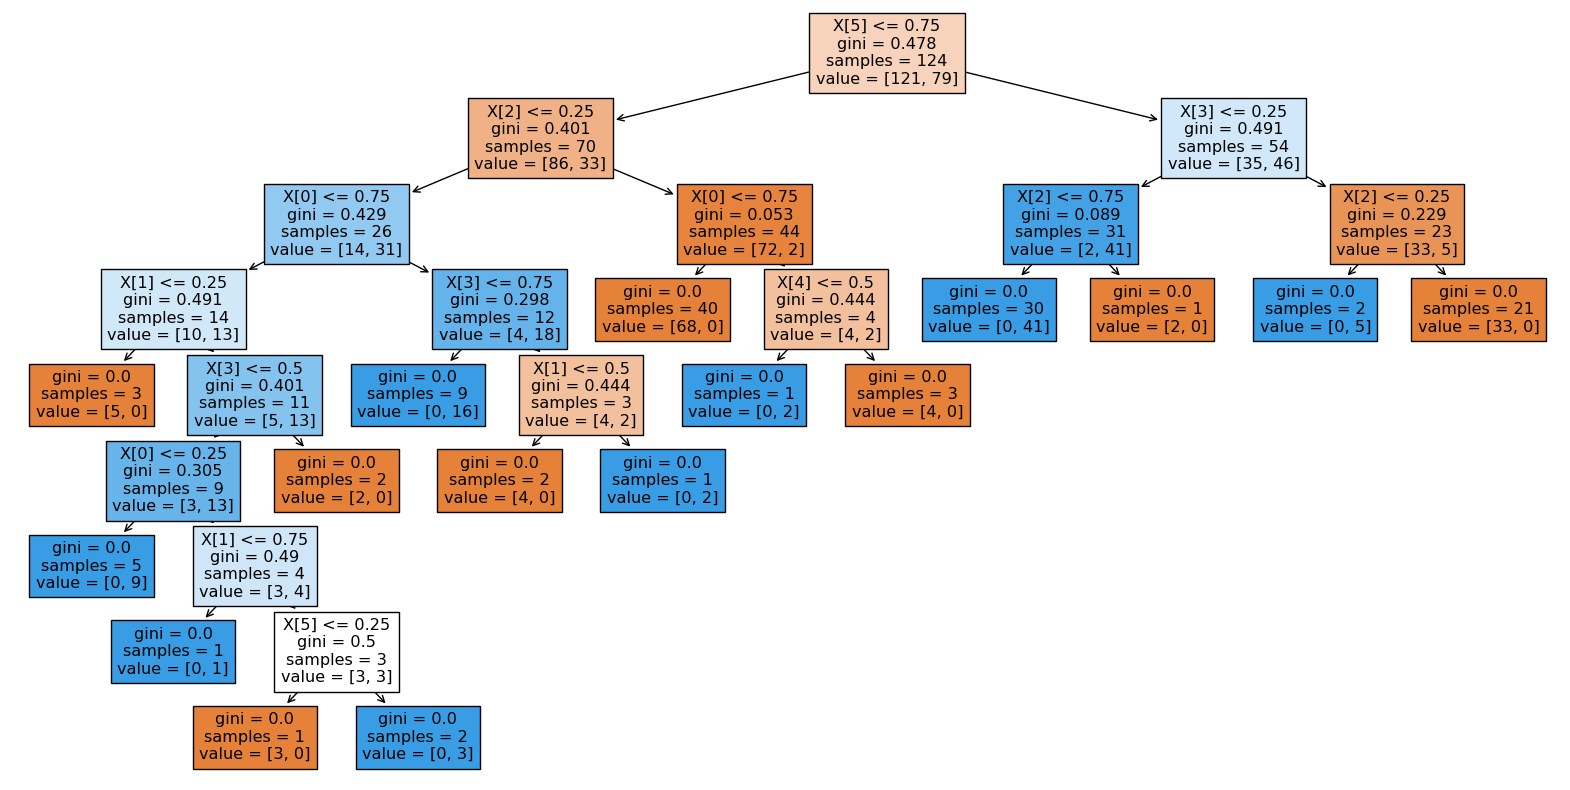

In [139]:
plt.figure(figsize=(20,10))
plot_tree(rf.estimators_[4], filled=True)
plt.show()

In [140]:
rf_pred_test = rf.predict(X_test)
rf_pred_test

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1], dtype=int64)

In [141]:
rf_pred_train = rf.predict(X_train)
rf_pred_train

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1], dtype=int64)

In [142]:
score = rf.score(X_test,y_test)
print(" RandomForest Test Accuracy : {:.2f}".format(score*100))

 RandomForest Test Accuracy : 100.00


In [143]:
score = rf.score(X_train,y_train)
print(" Random Forest Train Accuracy : {:.2f}".format(score*100))

 Random Forest Train Accuracy : 100.00


In [144]:
print(classification_report(y_test, rf_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        21

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



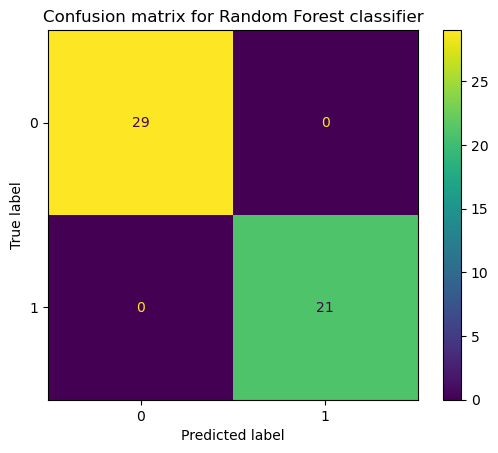

In [145]:
cf_rf = plot_confusion_matrix(rf, X_test, y_test)
cf_rf.ax_.set_title('Confusion matrix for Random Forest classifier')
plt.show()

# AdaBoostClassifier

In [146]:
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier(n_estimators=100, random_state=42)
ad.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [147]:
ad_pred_train = ad.predict(X_train)
ad_pred_train

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1], dtype=int64)

In [148]:
ad_pred_test = ad.predict(X_test)
ad_pred_test

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1], dtype=int64)

In [149]:
score = ad.score(X_train,y_train)
print(" AdaBoostClassifier Train Accuracy : {:.2f}".format(score*100))

 AdaBoostClassifier Train Accuracy : 100.00


In [150]:
score = ad.score(X_test,y_test)
print(" AdaBoostClassifier Test Accuracy : {:.2f}".format(score*100))

 AdaBoostClassifier Test Accuracy : 98.00


In [151]:
print(classification_report(y_test, ad_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.95      1.00      0.98        21

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



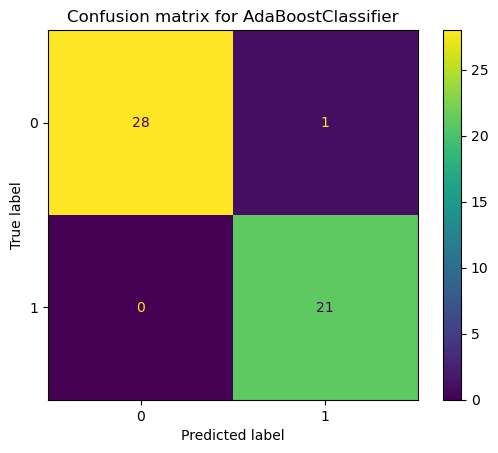

In [152]:
cf_ad = plot_confusion_matrix(ad, X_test, y_test)
cf_ad.ax_.set_title('Confusion matrix for AdaBoostClassifier')
plt.show()

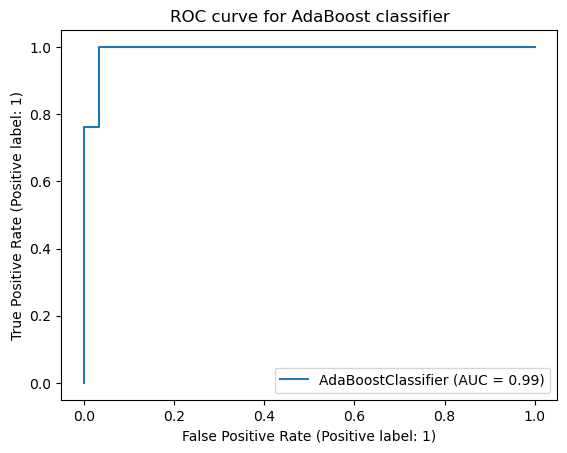

In [153]:
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(ad, X_test, y_test)
disp.ax_.set_title('ROC curve for AdaBoost classifier')
plt.show()

# XgBoost

In [154]:
import xgboost as xgb
xgb = xgb.XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [155]:
xgb_pred_train = xgb.predict(X_train)
xgb_pred_train

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1])

In [156]:
xgb_pred_test = xgb.predict(X_test)
xgb_pred_test

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1])

In [157]:
score = xgb.score(X_train,y_train)
print(" XGBoostClassifier Train Accuracy : {:.2f}".format(score*100))

 XGBoostClassifier Train Accuracy : 100.00


In [158]:
score = xgb.score(X_test,y_test)
print(" XGBoostClassifier Test Accuracy : {:.2f}".format(score*100))

 XGBoostClassifier Test Accuracy : 98.00


In [159]:
print(classification_report(y_test, xgb_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.95      1.00      0.98        21

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



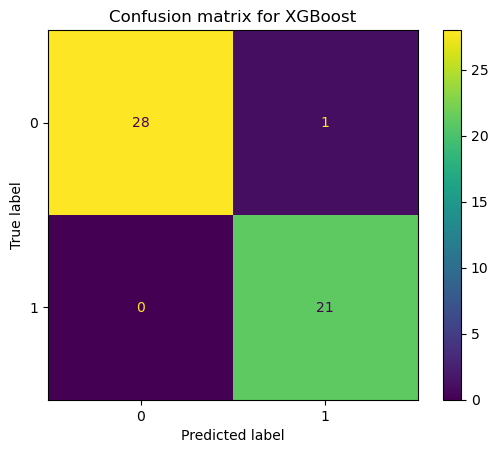

In [160]:
cf_xgb = plot_confusion_matrix(xgb, X_test, y_test)
cf_xgb.ax_.set_title('Confusion matrix for XGBoost')
plt.show()

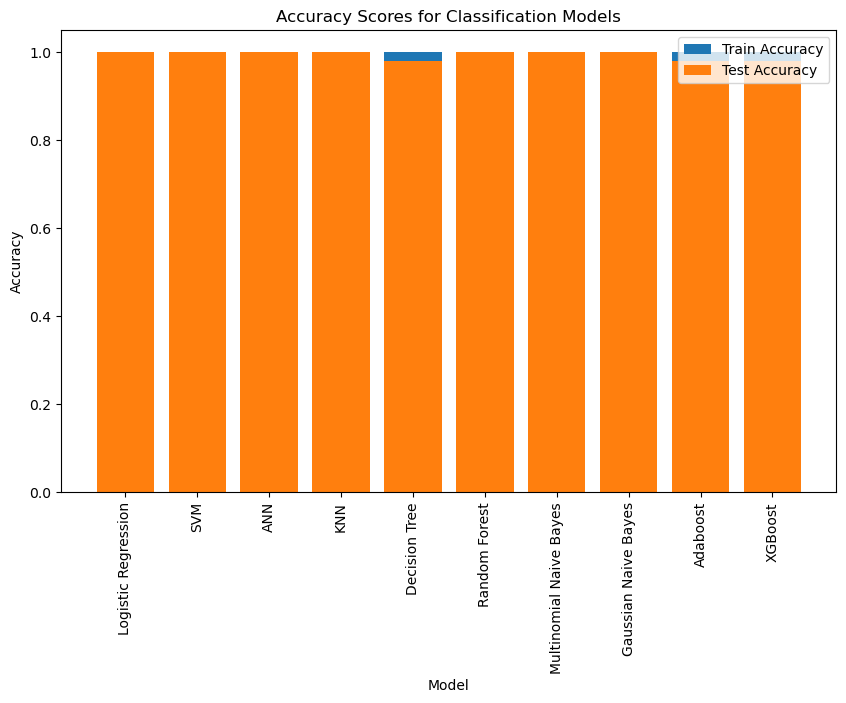

In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('SVM', SVC(kernel='linear')),
    ('ANN', MLPClassifier()),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Multinomial Naive Bayes', MultinomialNB()),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Adaboost', AdaBoostClassifier()),
    ('XGBoost', XGBClassifier())
]

# Train and evaluate each model
train_scores = []
test_scores = []
model_names = []

for name, model in models:
    model_names.append(name)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    train_score = accuracy_score(y_train, train_pred)
    train_scores.append(train_score)
    
    test_pred = model.predict(X_test)
    test_score = accuracy_score(y_test, test_pred)
    test_scores.append(test_score)

# Plot results
plt.figure(figsize=(10,6))
plt.bar(model_names, train_scores, label='Train Accuracy')
plt.bar(model_names, test_scores, label='Test Accuracy')
plt.title('Accuracy Scores for Classification Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(rotation=90)
plt.show()


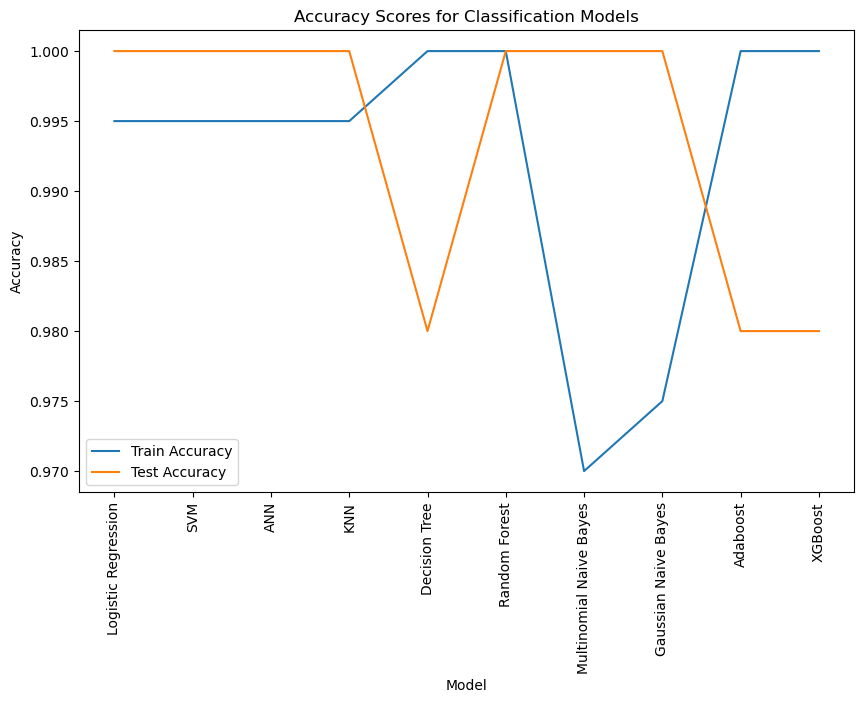

In [162]:
# Define models
models = [    ('Logistic Regression', LogisticRegression()), 
          ('SVM', SVC(kernel='linear')),
          ('ANN', MLPClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('Decision Tree', DecisionTreeClassifier()),
          ('Random Forest', RandomForestClassifier()), 
          ('Multinomial Naive Bayes', MultinomialNB()),
          ('Gaussian Naive Bayes', GaussianNB()),
          ('Adaboost', AdaBoostClassifier()),
          ('XGBoost', XGBClassifier())]

# Train and evaluate each model
train_scores = []
test_scores = []
model_names = []

for name, model in models:
    model_names.append(name)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    train_score = accuracy_score(y_train, train_pred)
    train_scores.append(train_score)
    
    test_pred = model.predict(X_test)
    test_score = accuracy_score(y_test, test_pred)
    test_scores.append(test_score)

# Plot results
plt.figure(figsize=(10,6))
plt.plot(model_names, train_scores, label='Train Accuracy')
plt.plot(model_names, test_scores, label='Test Accuracy')
plt.title('Accuracy Scores for Classification Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [163]:
from tabulate import tabulate

# Define models
models = [    ('Logistic Regression', LogisticRegression()), 
          ('SVM', SVC(kernel='linear')),
          ('ANN', MLPClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('Decision Tree', DecisionTreeClassifier()),
          ('Random Forest', RandomForestClassifier()), 
          ('Multinomial Naive Bayes', MultinomialNB()),
          ('Gaussian Naive Bayes', GaussianNB()),
          ('Adaboost', AdaBoostClassifier()),
          ('XGBoost', XGBClassifier())]

# Train and evaluate each model
train_scores = []
test_scores = []
model_names = []

for name, model in models:
    model_names.append(name)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    train_score = accuracy_score(y_train, train_pred)
    train_scores.append(train_score)
    
    test_pred = model.predict(X_test)
    test_score = accuracy_score(y_test, test_pred)
    test_scores.append(test_score)

# Format results as a table
headers = ['Model', 'Train Accuracy', 'Test Accuracy']
results = list(zip(model_names, train_scores, test_scores))
table = tabulate(results, headers=headers)
print(table)

Model                      Train Accuracy    Test Accuracy
-----------------------  ----------------  ---------------
Logistic Regression                 0.995             1
SVM                                 0.995             1
ANN                                 0.995             0.96
KNN                                 0.995             1
Decision Tree                       1                 0.98
Random Forest                       1                 1
Multinomial Naive Bayes             0.97              1
Gaussian Naive Bayes                0.975             1
Adaboost                            1                 0.98
XGBoost                             1                 0.98
